<a href="https://colab.research.google.com/github/FranciscoTeon/Video-game-ratings-best-to-worst-Data-Analysis/blob/main/popular_videogames_1980_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
games_df = pd.read_csv('games_df.csv')
games_df.head()

,Title,Release_Date,Team,Rating,Num_of_Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Day,Month,Year
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4.6K,4.8K,25,2,2022
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6.3K,3.6K,10,12,2019
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5K,2.6K,3,3,2017
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4.9K,1.8K,15,9,2015
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8.3K,2.3K,24,2,2017


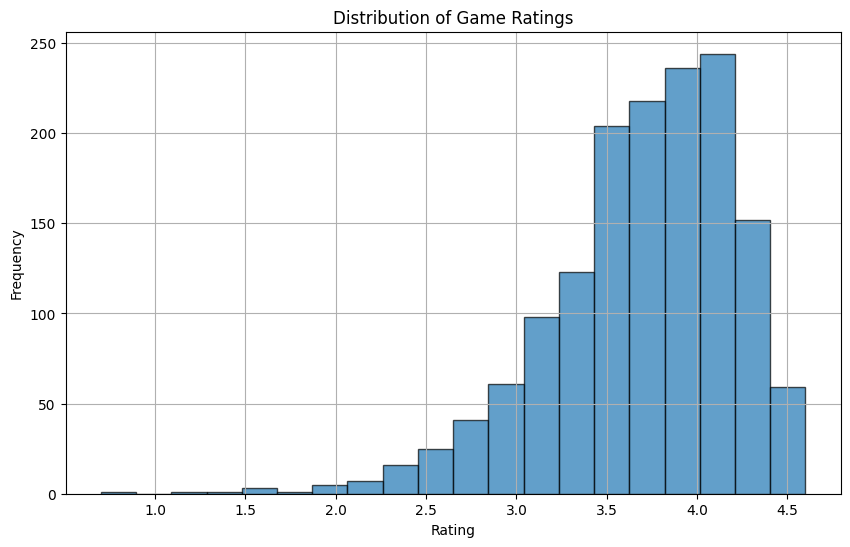

In [ ]:
#What is the distribution of game scores across the entire dataset?
plt.figure(figsize=(10, 6))
plt.hist(games_df['Rating'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#How many unique game titles are present in the dataset?
unique_titles = games_df['Title'].nunique()
print(f"The number of unique game titles are: {unique_titles}")

The number of unique game titles are: 1083


In [ ]:
#What is the average score for games across all platforms?
avg_score = games_df['Rating'].mean()
print(f"The average rating for games across all platforms is: {avg_score}")

The average rating for games across all platforms is: 3.718917112299465


In [ ]:
#Which genres are the most common in the dataset?
genre_counts = games_df['Genres'].value_counts()
print(genre_counts)

Genres
['Adventure', 'RPG']                                                         152
['Adventure', 'Platform']                                                    107
['Adventure', 'Shooter']                                                      80
['Shooter']                                                                   72
['Adventure', 'RPG', 'Turn Based Strategy']                                   48
                                                                            ... 
['Adventure', 'Brawler', 'Racing', 'Shooter']                                  1
['Arcade', 'Indie', 'Simulator', 'Strategy']                                   1
['Music', 'Platform', 'Racing', 'Sport']                                       1
['Adventure', 'RPG', 'Simulator', 'Strategy', 'Tactical', 'Visual Novel']      1
['Simulator', 'Strategy', 'Tactical']                                          1
Name: count, Length: 254, dtype: int64


In [ ]:
#What are the top 10 highest-rated games?
top_10_highest_games = games_df[['Title', 'Rating']].nlargest(10, 'Rating')
print(top_10_highest_games)

                             Title  Rating
28    Disco Elysium: The Final Cut     4.6
43                     Outer Wilds     4.6
139                  Disco Elysium     4.6
252   Umineko: When They Cry Chiru     4.6
297    Bloodborne: The Old Hunters     4.6
354   Disco Elysium: The Final Cut     4.6
369                    Outer Wilds     4.6
428                  Disco Elysium     4.6
539   Umineko: When They Cry Chiru     4.6
713  Hitman World of Assassination     4.6


In [ ]:
#What are the top 10 lowest-rated games?
top_10_lowest_games = games_df[['Title', 'Rating']].nsmallest(10, 'Rating')
print(top_10_lowest_games)

                                      Title  Rating
1442  Superman: The New Superman Adventures     0.7
740                        Garten of Banban     1.2
1410                            Mega Man X7     1.4
1237                     Garten of Banban 2     1.5
940                         Devil May Cry 2     1.6
1479                           Mighty No. 9     1.6
1481             Dragon Ball GT: Final Bout     1.8
260                            Sonic Forces     1.9
547                            Sonic Forces     1.9
754              Sonic and the Secret Rings     1.9


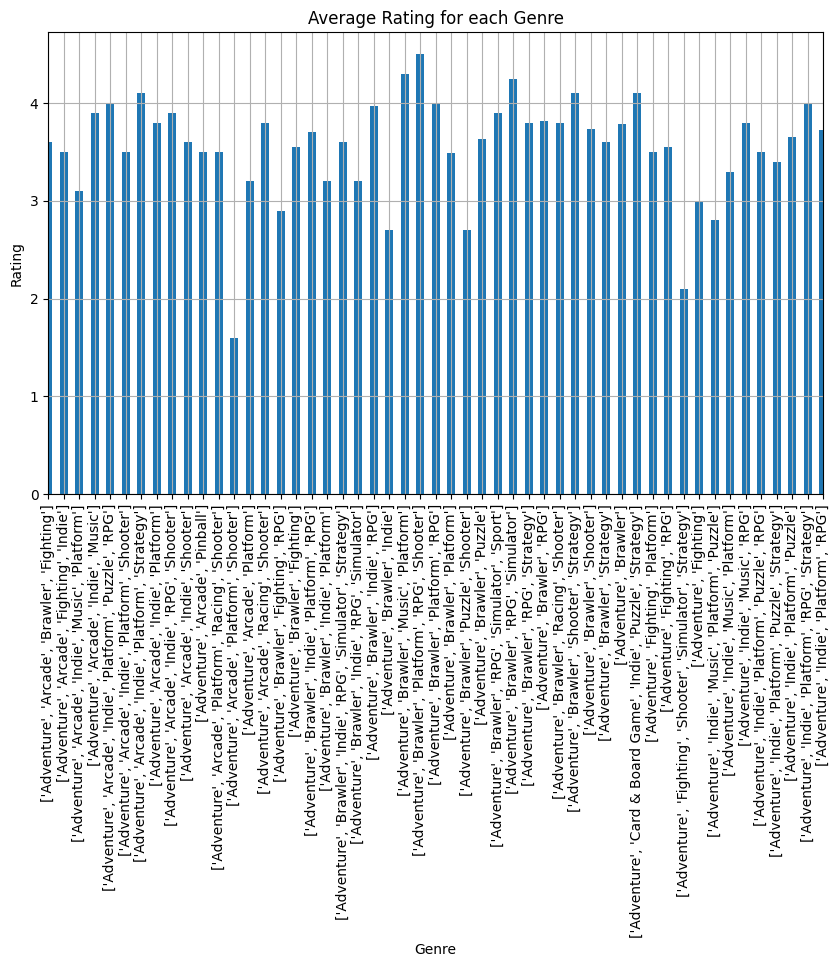

In [ ]:
#What is the average score for each genre?
plt.figure(figsize=(10, 6))
games_df.groupby('Genres')['Rating'].mean().plot(kind="bar")

plt.title('Average Rating for each Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.grid(True)
plt.xlim(0, 50)

plt.show()

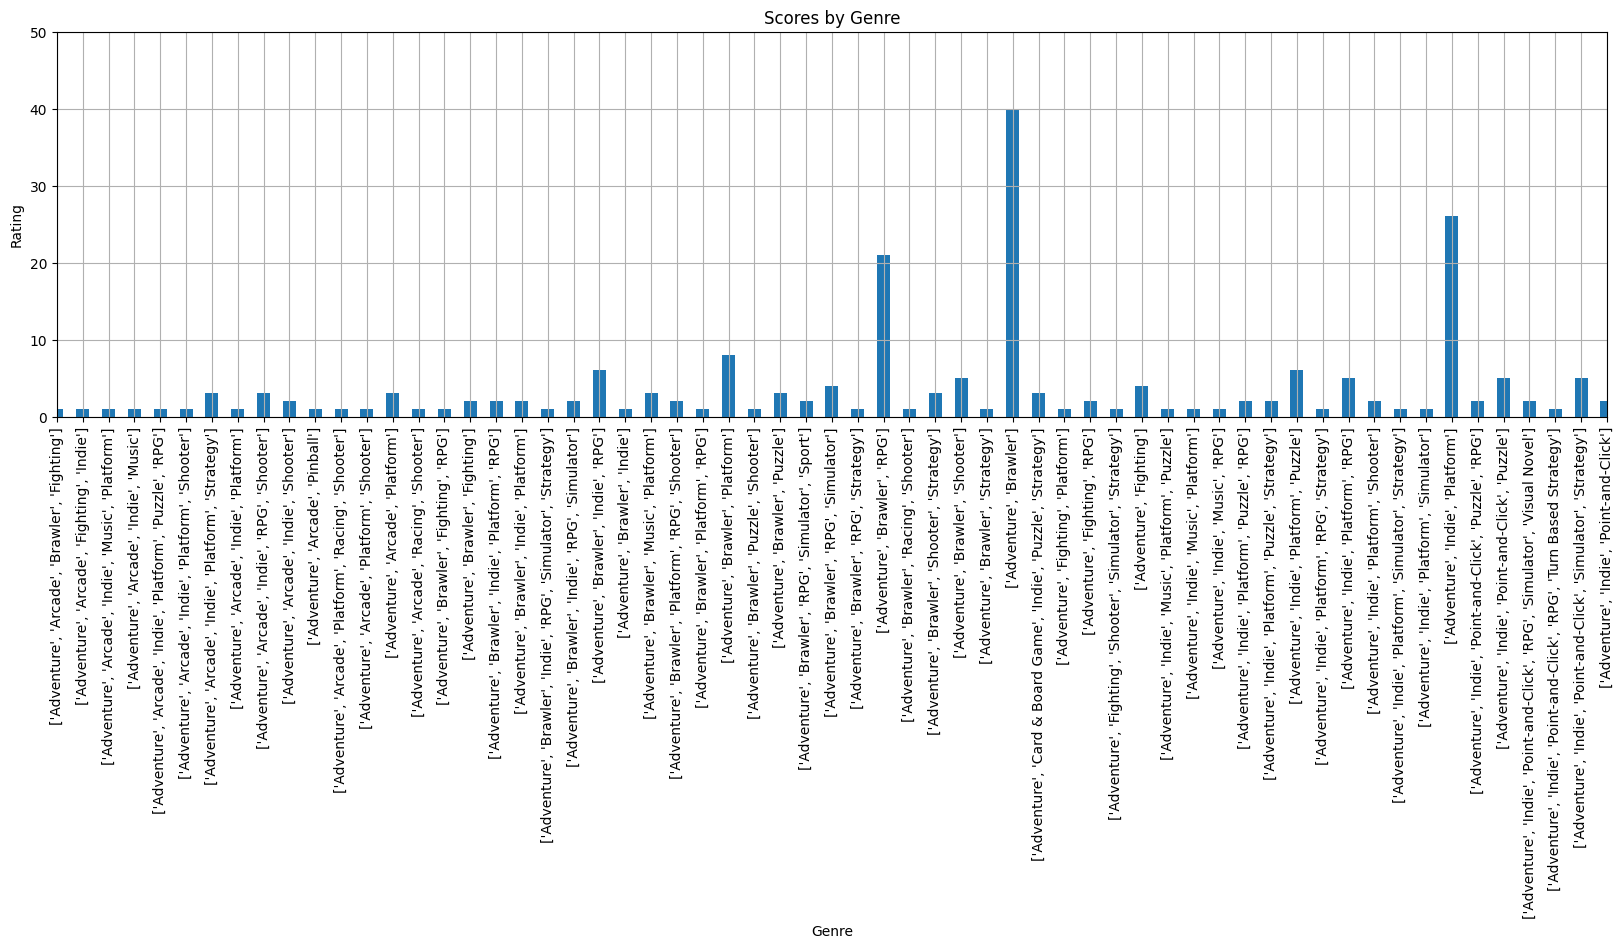

In [ ]:
#How do scores vary by genre?
plt.figure(figsize=(20, 5))
games_df.groupby('Genres')['Rating'].count().plot(kind="bar")
plt.title('Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(0, 50)
plt.xlim(0, 60)

plt.grid(True)

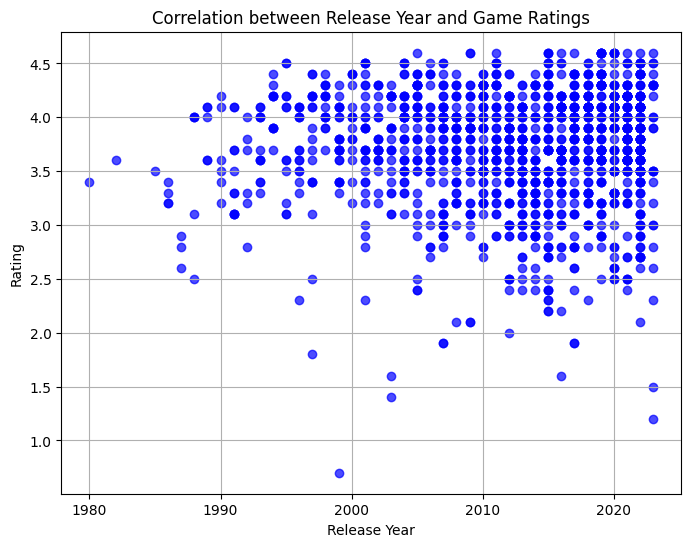

In [ ]:
#Is there any correlation between release year and game scores?
plt.figure(figsize=(8, 6))
plt.scatter(games_df['Year'], games_df['Rating'], color='blue', alpha=0.7)
plt.title('Correlation between Release Year and Game Ratings')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.grid(True)

plt.show()

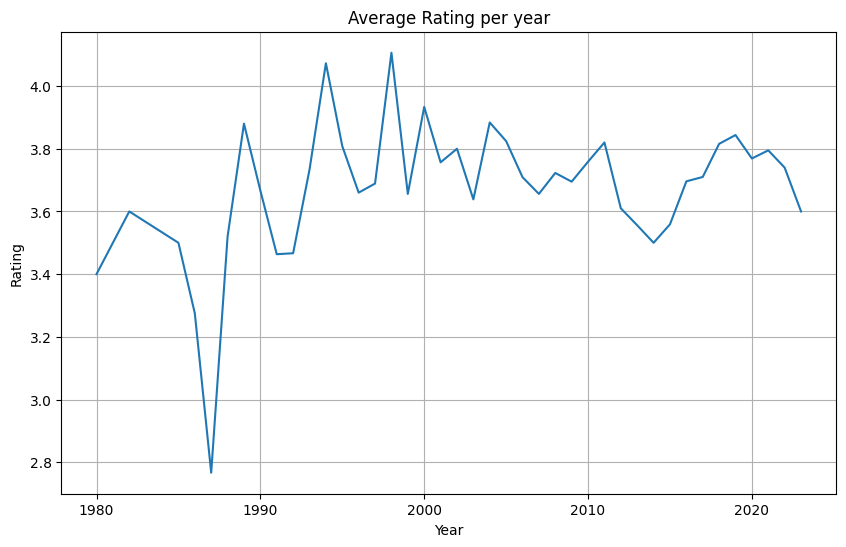

In [ ]:
#Which year had the highest average game score?
plt.figure(figsize=(10, 6))
games_df.groupby('Year')['Rating'].mean().plot(kind="line")

plt.title('Average Rating per year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)

plt.show()

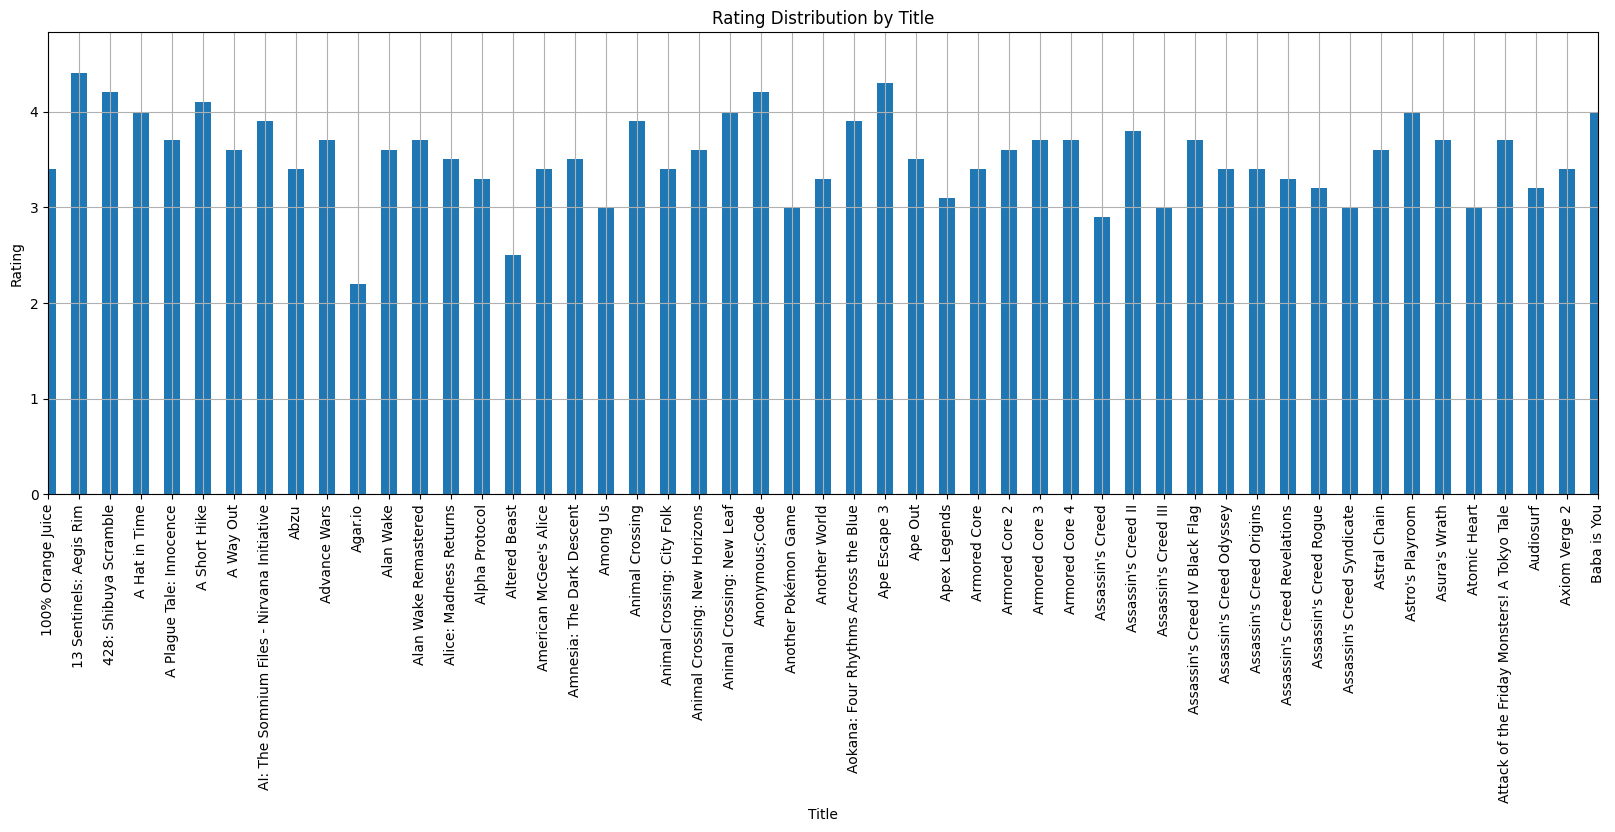

In [ ]:
#How does the Rating distribution vary by title?
plt.figure(figsize=(20, 6))
games_df.groupby('Title')['Rating'].mean().plot(kind='bar')
plt.title('Rating Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Rating')
plt.xlim(0, 50)
plt.grid(True)

plt.show()

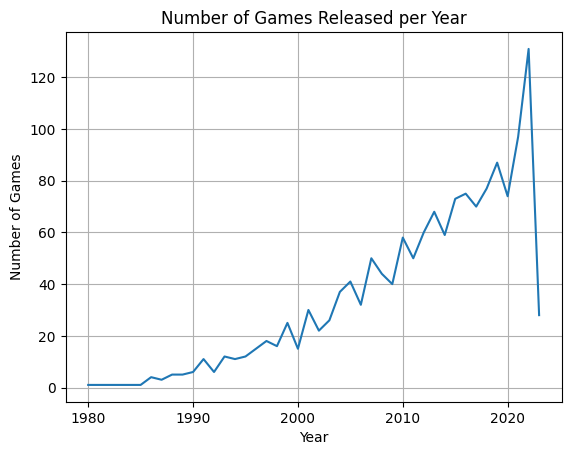

In [ ]:
#How has the number of games released per year changed over time?
games_df.groupby('Year')['Title'].count().plot(kind='line')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)

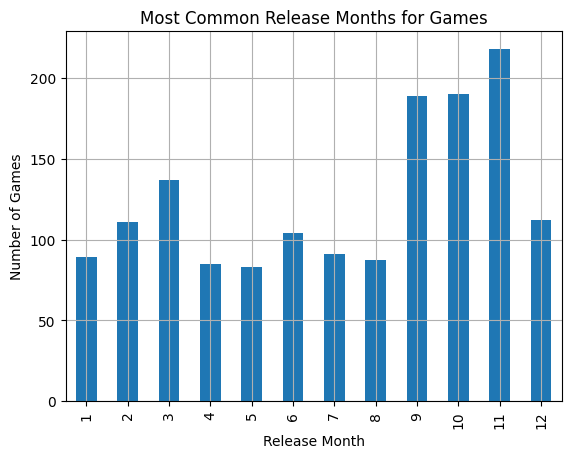

In [ ]:
#What are the most common release months for games?
games_df.groupby('Month')['Title'].count().plot(kind='bar')
plt.title('Most Common Release Months for Games')
plt.xlabel('Release Month')
plt.ylabel('Number of Games')
plt.grid(True)

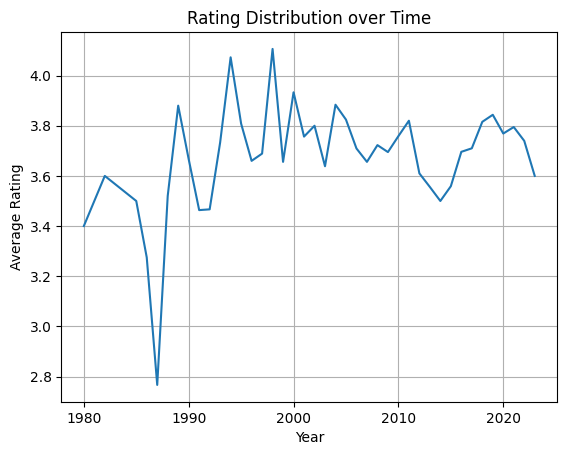

In [ ]:
#Are there trends in the score distribution over time?
games_df.groupby('Year')['Rating'].mean().plot(kind='line')
plt.title('Rating Distribution over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)


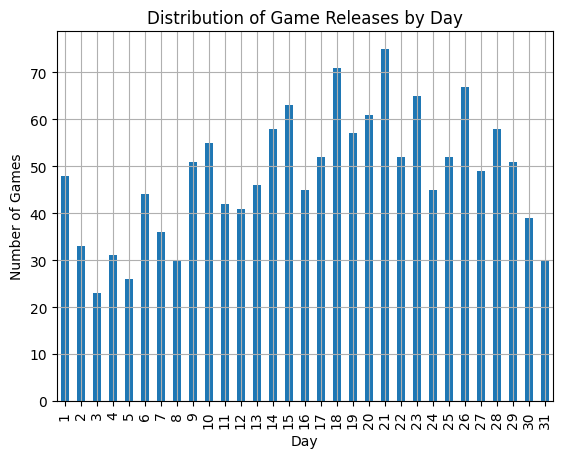

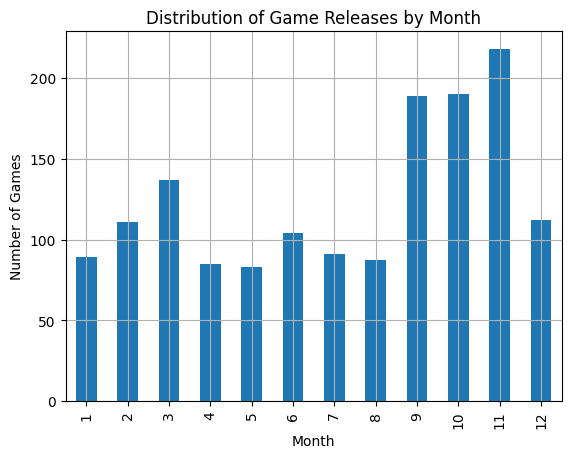

In [ ]:
#What is the distribution of game releases by month and day?
games_df.groupby('Day')['Title'].count().plot(kind='bar')
plt.title('Distribution of Game Releases by Day')
plt.xlabel('Day')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

games_df.groupby('Month')['Title'].count().plot(kind='bar')
plt.title('Distribution of Game Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()


In [ ]:
#Which Genre has the highest-rated games on average?
avg_score_by_genre= games_df.groupby('Genres')['Rating'].mean()
highest_rated_genre = avg_score_by_genre.idxmax()
print(f"The platform with the highest-rated games on average is: {highest_rated_genre}")

The platform with the highest-rated games on average is: ['Adventure', 'Brawler', 'Platform', 'RPG', 'Shooter']


In [ ]:
#Average Rating per genre?
specif_rating = games_df.groupby(['Genres'])['Rating'].mean()
specif_rating.head(30)

,Rating
Genres,
"['Adventure', 'Arcade', 'Brawler', 'Fighting']",3.600000
"['Adventure', 'Arcade', 'Fighting', 'Indie']",3.500000
"['Adventure', 'Arcade', 'Indie', 'Music', 'Platform']",3.100000
"['Adventure', 'Arcade', 'Indie', 'Music']",3.900000
"['Adventure', 'Arcade', 'Indie', 'Platform', 'Puzzle', 'RPG']",4.000000
"['Adventure', 'Arcade', 'Indie', 'Platform', 'Shooter']",3.500000
"['Adventure', 'Arcade', 'Indie', 'Platform', 'Strategy']",4.100000
"['Adventure', 'Arcade', 'Indie', 'Platform']",3.800000
"['Adventure', 'Arcade', 'Indie', 'RPG', 'Shooter']",3.900000


In [ ]:
#Are there games with unusually high or low scores for their genre?
genre_stats = games_df.groupby('Genres')['Rating'].agg(['mean', 'std']).reset_index()

# Merge the stats back to the original dataframe
df = pd.merge(games_df, genre_stats, on='Genres', how='left')

# Calculate the Z-score
df['z_score'] = (games_df['Rating'] - df['mean']) / df['std']

# Identify outliers
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

print(outliers[['Title', 'Rating', 'mean', 'std', 'z_score']])

                                                 Title  Rating      mean  \
124   Teenage Mutant Ninja Turtles: Shredder's Revenge     3.8  3.800000   
125                                               Sifu     3.8  3.800000   
404   Teenage Mutant Ninja Turtles: Shredder's Revenge     3.8  3.800000   
414                                               Sifu     3.8  3.800000   
581                                          Forspoken     2.3  3.863158   
740                                   Garten of Banban     1.2  3.426667   
863   Teenage Mutant Ninja Turtles: Shredder's Revenge     3.8  3.800000   
873                                               Sifu     3.8  3.800000   
940                                    Devil May Cry 2     1.6  3.787500   
1237                                Garten of Banban 2     1.5  3.637037   
1350                                       Mega Man X6     2.3  3.742056   
1410                                       Mega Man X7     1.4  3.742056   
1442        